### **Importing Libraries**


In [217]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### **Downloading the Dataset**

In [219]:
# Download latest version of the dataset
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Shahm\.cache\kagglehub\datasets\datamunge\sign-language-mnist\versions\1


In [220]:
# changing working directory to where the dataset is present
import os

os.chdir("C:/Users/Shahm/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1")

In [221]:
# listing all files in the current directory
!dir /on

 Volume in drive C has no label.
 Volume Serial Number is 8441-CA4B

 Directory of C:\Users\Shahm\.cache\kagglehub\datasets\datamunge\sign-language-mnist\versions\1

09/04/2025  23:38    <DIR>          .
09/04/2025  23:38    <DIR>          ..
23/03/2025  05:25           487,452 amer_sign2.png
23/03/2025  05:25            44,527 amer_sign3.png
23/03/2025  05:25           208,007 american_sign_language.PNG
10/04/2025  07:28               858 sign_language_eval.csv
23/03/2025  05:25    <DIR>          sign_mnist_test
23/03/2025  05:25        21,777,485 sign_mnist_test.csv
23/03/2025  05:25    <DIR>          sign_mnist_train
23/03/2025  05:25        83,281,065 sign_mnist_train.csv
               6 File(s)    105,799,394 bytes
               4 Dir(s)  186,470,395,904 bytes free


### **Loading the Data**

#### Train Data

In [224]:
# loading the train data
train_data = pd.read_csv("sign_mnist_train.csv")

In [225]:
# inspecting the first 5 rows of the training data
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [226]:
# checking the unique values of the label column
train_data["label"].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14], dtype=int64)

In [227]:
# checking the number of unique labels
train_data["label"].nunique()

24

In [228]:
# checking the label distribution
train_data["label"].value_counts()

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

In [229]:
# check the shape of the data
train_data.shape

(27455, 785)

In [230]:
# checking the number of null values in the dataset
train_data.isnull().sum().sum()

0

#### Test Data

In [232]:
# loading the test data
test_data = pd.read_csv("sign_mnist_test.csv")

In [233]:
# inspecting the first 5 rows of the test data
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [234]:
# check the unique values of the label column
test_data["label"].unique()

array([ 6,  5, 10,  0,  3, 21, 14,  7,  8, 12,  4, 22,  2, 15,  1, 13, 19,
       18, 23, 17, 20, 16, 11, 24], dtype=int64)

In [235]:
# check the number of unique labels
test_data["label"].nunique()

24

In [236]:
# check the label distribution
test_data["label"].value_counts()

label
4     498
7     436
1     432
12    394
6     348
15    347
21    346
24    332
0     331
10    331
2     310
13    291
8     288
23    267
20    266
19    248
5     247
14    246
18    246
3     245
11    209
22    206
16    164
17    144
Name: count, dtype: int64

In [237]:
# check the shape of the data
test_data.shape

(7172, 785)

In [238]:
# checking the number of null values in the test data
test_data.isnull().sum().sum()

0

### **Data Partitioning**

In [240]:
# splitting the data into train and test
X_train = train_data.drop(columns = "label")
y_train = train_data["label"]

X_test = test_data.drop(columns = "label")
y_test = test_data["label"]

### **Data Scaling**

In [242]:
# using standard scaler to scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Data Table for Evaluation Metrics**

In [244]:
eval = pd.DataFrame(columns=['algorithm','train_accuracy','test_accuracy','precision_score','recall_score','f1_score','roc_auc_score'])

### **K-Nearest Neighbours (KNN)**

#### Running the model on unscaled data

In [247]:
# fitting a k-nearest neighbor model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [248]:
# getting prediction from knn
prediction = knn.predict(X_test)
prediction

array([ 6,  5, 21, ...,  2,  4,  2], dtype=int64)

In [249]:
# checking the first 20 rows of the prediction
prediction[:20] == y_test[:20]

0      True
1      True
2     False
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: label, dtype: bool

In [250]:
# checking the accuracy of the model
knn.score(X_test, y_test)

0.8039598438371445

In [251]:
# fitting a k-nearest neighbor model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [252]:
# getting prediction from knn
prediction = knn.predict(X_test_scaled)
prediction

array([ 6,  5, 21, ...,  2,  4,  2], dtype=int64)

#### Running the model on scaled data

In [254]:
# checking the first 20 rows of the prediction
prediction[:20] == y_test[:20]

0      True
1      True
2     False
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: label, dtype: bool

In [255]:
# checking the accuracy of the model
knn.score(X_test_scaled, y_test)

0.8126045733407696

#### Selecting the optimal value for n_neighbors

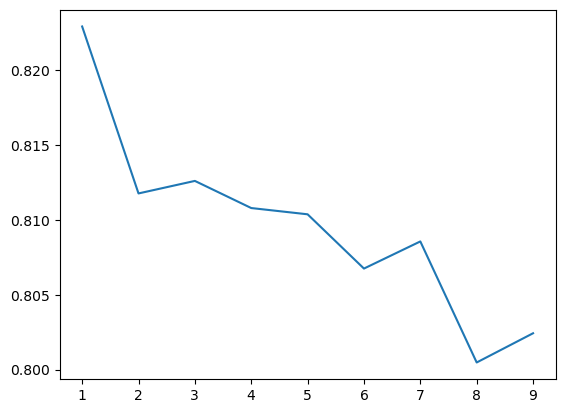

In [257]:
# running the model for different values of K

results = np.empty(9)   # marginally faster
# results = np.zeros(9)   # safer
for K in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=K)
  knn.fit(X_train_scaled, y_train)
  results[K-1] = knn.score(X_test_scaled, y_test)
%matplotlib inline

plt.plot(np.arange(9)+1,results)

#### Model Selection and Evaluation

In [259]:
# selecting the best model

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(
knn.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.823


In [260]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       331
           1       0.95      0.92      0.93       432
           2       0.96      1.00      0.98       310
           3       0.82      0.93      0.87       245
           4       0.79      0.98      0.88       498
           5       0.99      0.95      0.97       247
           6       0.92      0.94      0.93       348
           7       0.98      0.97      0.98       436
           8       0.92      0.67      0.78       288
          10       0.88      0.60      0.71       331
          11       0.95      0.93      0.94       209
          12       0.79      0.58      0.67       394
          13       0.81      0.67      0.73       291
          14       1.00      0.93      0.96       246
          15       1.00      1.00      1.00       347
          16       0.89      1.00      0.94       164
          17       0.37      0.58      0.45       144
          18       0.68    

In [261]:
# getting the evulation metrics for the table
train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)
precision = precision_score(y_test, prediction,average='weighted')
recall = recall_score(y_test, prediction,average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')
y_proba = knn.predict_proba(X_test_scaled)
auc_score = roc_auc_score(y_test, y_proba,multi_class='ovo',average='weighted')

# pushing the metrics to the table
results = ["K Nearest Neighbors",train_accuracy, test_accuracy, precision, recall, f1,auc_score]
new_row = pd.DataFrame([results], columns=["algorithm","train_accuracy", "test_accuracy", "precision_score", "recall_score", "f1_score","roc_auc_score"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval


C:\Users\Shahm\AppData\Local\Temp\ipykernel_14940\4177961285.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval = pd.concat([eval, new_row], ignore_index=True)


,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,1.0,0.822922,0.840927,0.822922,0.824225,0.905546


### **Decision tree learning (DT)**

#### Running the model on unscaled data

In [264]:
# fitting a decision tree classifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf = clf.fit(X_train, y_train)

In [265]:
# generating predictions for the test set
prediction = clf.predict(X_test)

In [266]:
# comparing the first 20 predictions with the actual values
prediction[:20] == y_test[:20]

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11     True
12    False
13     True
14     True
15     True
16     True
17    False
18     True
19     True
Name: label, dtype: bool

In [267]:
# getting the accuracy on the test set
clf.score(X_test, y_test)

0.4786670384829894

#### Running the model on scaled data

In [269]:
# fitting a decision tree classifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf = clf.fit(X_train_scaled, y_train)

In [270]:
# generating predictions for the test set
prediction = clf.predict(X_test_scaled)

In [271]:
# comparing the first 20 predictions with the actual values
prediction[:20] == y_test[:20]

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11     True
12    False
13     True
14     True
15     True
16     True
17    False
18     True
19     True
Name: label, dtype: bool

In [272]:
# getting the accuracy on the test set
clf.score(X_test_scaled, y_test)

0.47922476296709426

#### Using a different parameter setting for the model

In [274]:
# using a different criterion for the decision tree

clf = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
clf = clf.fit(X_train_scaled, y_train)
prediction = clf.predict(X_test_scaled)
clf.score(X_test_scaled, y_test)

0.4372559955382041

#### Model Selection and Evaluation

In [276]:
# selecting the best model

clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf.fit(X_train_scaled, y_train)
prediction = clf.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(
clf.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.479


In [277]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       331
           1       0.67      0.65      0.66       432
           2       0.80      0.83      0.81       310
           3       0.41      0.42      0.41       245
           4       0.76      0.61      0.68       498
           5       0.52      0.57      0.54       247
           6       0.45      0.45      0.45       348
           7       0.72      0.63      0.67       436
           8       0.28      0.27      0.27       288
          10       0.34      0.24      0.28       331
          11       0.35      0.55      0.43       209
          12       0.35      0.26      0.30       394
          13       0.33      0.33      0.33       291
          14       0.60      0.41      0.49       246
          15       0.72      0.60      0.65       347
          16       0.55      0.80      0.65       164
          17       0.06      0.15      0.09       144
          18       0.24    

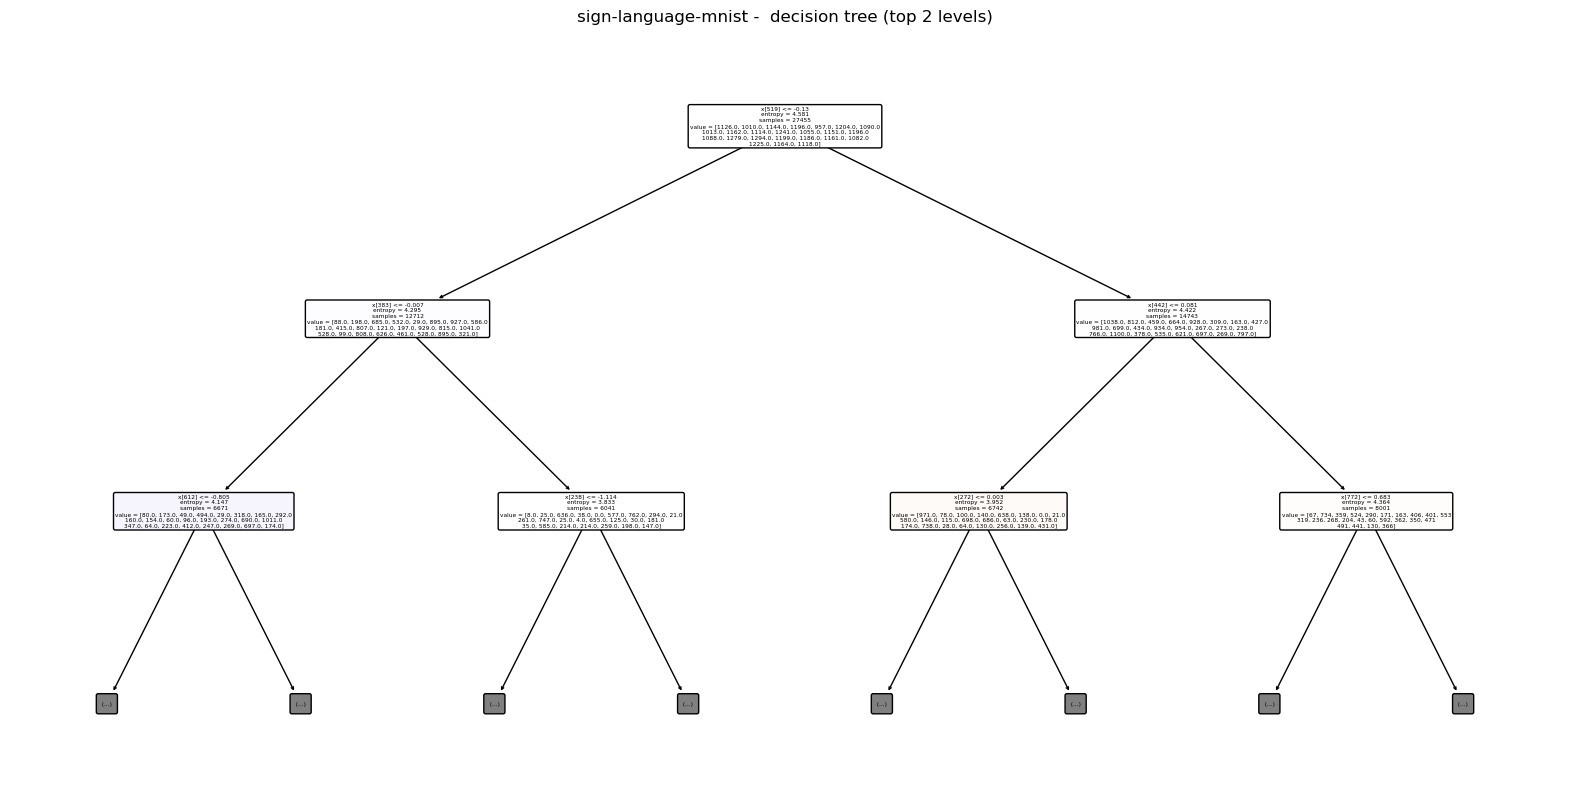

In [278]:
# Visualize top layers of the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, max_depth=2, filled=True, rounded=True)
plt.title("sign-language-mnist -  decision tree (top 2 levels)")
plt.show()

In [279]:
# getting the evulation metrics for the table
train_accuracy = clf.score(X_train_scaled, y_train)
test_accuracy = clf.score(X_test_scaled, y_test)
precision = precision_score(y_test, prediction,average='weighted')
recall = recall_score(y_test, prediction,average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')
y_proba = clf.predict_proba(X_test_scaled)
auc_score = roc_auc_score(y_test, y_proba,multi_class='ovo',average='weighted')

# pushing the metrics to the table
results = ["Decision Tree Classifier",train_accuracy, test_accuracy, precision, recall, f1,auc_score]
new_row = pd.DataFrame([results], columns=["algorithm","train_accuracy", "test_accuracy", "precision_score", "recall_score", "f1_score","roc_auc_score"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,1.0,0.822922,0.840927,0.822922,0.824225,0.905546
1,Decision Tree Classifier,1.0,0.479225,0.498604,0.479225,0.484004,0.725104


### **Support Vector Machine (SVM)**


#### Running the model on unscaled data

In [282]:
# fitting a SVM
svm = SVC(kernel="linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [283]:
# getting the predictions from the test data
prediction = svm.predict(X_test)

In [284]:
# comparing the first 20 predictions with the actual values
prediction[:20] == y_test[:20]

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: label, dtype: bool

In [285]:
# accuracy of the model
svm.score(X_test,y_test)

0.7816508644729504

#### Running the model on scaled data

In [287]:
# fitting a SVM
svm = SVC(kernel="linear")
svm.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [288]:
# getting the predictions from the test data
prediction = svm.predict(X_test_scaled)

In [289]:
# comparing the first 20 predictions with the actual values
prediction[:20] == y_test[:20]

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: label, dtype: bool

In [290]:
# accuracy of the model
svm.score(X_test_scaled,y_test)

0.8053541550474066

#### Running the model on the different parameter setting

In [292]:
# using a differnet kernel setting
svm = SVC(kernel="rbf")
svm.fit(X_train_scaled,y_train)
prediction = svm.predict(X_test_scaled)
svm.score(X_test_scaled,y_test)

0.848856664807585

#### Model Selection and Evaluation

In [294]:
# using the best model
svm = SVC(kernel="rbf")
svm.fit(X_train_scaled, y_train)
prediction = svm.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(
svm.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.849


In [295]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       331
           1       1.00      0.99      0.99       432
           2       0.95      1.00      0.97       310
           3       0.96      1.00      0.98       245
           4       0.95      0.99      0.97       498
           5       0.82      0.86      0.84       247
           6       0.93      0.94      0.94       348
           7       1.00      0.95      0.98       436
           8       0.81      0.88      0.85       288
          10       0.81      0.63      0.71       331
          11       0.88      1.00      0.94       209
          12       0.82      0.78      0.80       394
          13       0.90      0.66      0.76       291
          14       0.92      0.93      0.93       246
          15       1.00      1.00      1.00       347
          16       0.99      1.00      1.00       164
          17       0.26      0.47      0.33       144
          18       0.70    

In [296]:
# getting the evulation metrics for the table
train_accuracy = svm.score(X_train_scaled, y_train)
test_accuracy = svm.score(X_test_scaled, y_test)
precision = precision_score(y_test, prediction,average='weighted')
recall = recall_score(y_test, prediction,average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_proba = svm.predict_proba(X_test_scaled)
auc_score = roc_auc_score(y_test, y_proba,multi_class='ovo',average='weighted')

# pushing the metrics to the table
results = ["Support Vector Machine",train_accuracy, test_accuracy, precision, recall, f1,auc_score]
new_row = pd.DataFrame([results], columns=["algorithm","train_accuracy", "test_accuracy", "precision_score", "recall_score", "f1_score","roc_auc_score"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,1.0,0.822922,0.840927,0.822922,0.824225,0.905546
1,Decision Tree Classifier,1.0,0.479225,0.498604,0.479225,0.484004,0.725104
2,Support Vector Machine,1.0,0.848857,0.861457,0.848857,0.851152,0.991081


### **Neural networks (NN)**

#### Training the model on unscaled data

In [299]:
# fitting the multi layer perceptron model
mlp = MLPClassifier(random_state=42)
mlp = mlp.fit(X_train, y_train)

In [300]:
# generate the predictions from the test set
prediction =  mlp.predict(X_test)

In [301]:
# comparing the first 20 predictions with the actual values
prediction[:20] == y_test[:20]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: label, dtype: bool

In [302]:
# accuracy of the model on the test set
mlp.score(X_test, y_test)

0.0522866703848299

#### Training the model on scaled data

In [304]:
# fitting the multi layer perceptron model
mlp = MLPClassifier(random_state=42)
mlp = mlp.fit(X_train_scaled, y_train)

In [305]:
# generate the predictions from the test set
prediction =  mlp.predict(X_test_scaled)

In [306]:
# comparing the first 20 predictions with the actual values
prediction[:20] == y_test[:20]

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: label, dtype: bool

In [307]:
# accuracy of the model on the test set
mlp.score(X_test_scaled, y_test)

0.8032626882320134

#### Optimizing the parameters of the model

In [309]:
# increasing the number of hidden units in the MLP
mlp = MLPClassifier(hidden_layer_sizes=300,random_state=42)
mlp = mlp.fit(X_train_scaled, y_train)
prediction =  mlp.predict(X_test_scaled)
mlp.score(X_test_scaled, y_test)

0.8229224762967094

#### Model Selection and Evaluation

In [311]:
# selecting the best model
mlp = MLPClassifier(hidden_layer_sizes=300,random_state=42)
mlp.fit(X_train_scaled, y_train)
prediction =  mlp.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.823


In [312]:
# getting the evulation metrics for the table
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)
precision = precision_score(y_test, prediction,average='weighted')
recall = recall_score(y_test, prediction,average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')
y_proba = mlp.predict_proba(X_test_scaled)
auc_score = roc_auc_score(y_test, y_proba,multi_class='ovo',average='weighted')

# pushing the metrics to the table
results = ["Neural Network",train_accuracy, test_accuracy, precision, recall, f1,auc_score]
new_row = pd.DataFrame([results], columns=["algorithm","train_accuracy", "test_accuracy", "precision_score", "recall_score", "f1_score","roc_auc_score"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,1.0,0.822922,0.840927,0.822922,0.824225,0.905546
1,Decision Tree Classifier,1.0,0.479225,0.498604,0.479225,0.484004,0.725104
2,Support Vector Machine,1.0,0.848857,0.861457,0.848857,0.851152,0.991081
3,Neural Network,1.0,0.822922,0.833786,0.822922,0.824371,0.987339


### **Custom Model - (Logistic Regression From Scracth)** 

In [314]:
unique_labels = np.unique(y_train)
print("Unique labels in training set:", unique_labels)
# Create a mapping from the original label to a new index (0 to 24)
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

# Map the labels for both training and testing sets
y_train_mapped = np.array([label_to_index[label] for label in y_train])
y_test_mapped = np.array([label_to_index[label] for label in y_test])

Unique labels in training set: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [315]:
def one_hot(y, num_classes):
    """Convert an array of labels to one-hot encoded matrix."""
    return np.eye(num_classes)[y]

In [316]:
def softmax(z):
    """Compute the softmax of each row of the input z."""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [317]:
def predict(X, W, b):
    """Predict class labels for samples in X."""
    z = np.dot(X, W) + b
    probabilities = softmax(z)
    return np.argmax(probabilities, axis=1)

In [318]:
num_classes = len(np.unique(y_train_mapped))
y_train_encoded = one_hot(y_train_mapped, num_classes)
y_test_encoded = one_hot(y_test_mapped, num_classes)

In [319]:
n_features = X_train_scaled.shape[1]
W = np.random.randn(n_features, num_classes) * 0.01
b = np.zeros((1, num_classes))

In [320]:
learning_rate = 0.1
num_epochs = 1000
m = X_train_scaled.shape[0]

In [321]:
for epoch in range(num_epochs):
    # Forward pass
    z = np.dot(X_train_scaled, W) + b
    a = softmax(z)
    
    # Compute categorical cross-entropy loss
    loss = -np.sum(y_train_encoded * np.log(a + 1e-8)) / m

    # Backward pass: compute gradients
    dz = a - y_train_encoded
    dW = np.dot(X_train_scaled.T, dz) / m
    db = np.sum(dz, axis=0, keepdims=True) / m
    
    # Update parameters
    W -= learning_rate * dW
    b -= learning_rate * db
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 3.2121
Epoch 100: Loss = 0.6865
Epoch 200: Loss = 0.4686
Epoch 300: Loss = 0.3581
Epoch 400: Loss = 0.2886
Epoch 500: Loss = 0.2405
Epoch 600: Loss = 0.2054
Epoch 700: Loss = 0.1787
Epoch 800: Loss = 0.1580
Epoch 900: Loss = 0.1414


In [322]:
# Compute training accuracy
train_preds = predict(X_train_scaled, W, b)
train_accuracy = np.mean(train_preds == y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

z_test = np.dot(X_test_scaled, W) + b
a_test = softmax(z_test)
predictions = np.argmax(a_test, axis=1)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Train Accuracy: 36.05%
Test Accuracy: 38.79%


In [323]:
# Use average='macro' for multiclass metrics
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# For ROC AUC, you need one-hot encoded true and predicted probs (not labels)
roc_auc = roc_auc_score(y_test_encoded, a_test, average='macro', multi_class='ovr')

C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [324]:
results = [
    "Scratch Logistic Regression",  # Algorithm name
    train_accuracy,                 # Training Accuracy
    accuracy,                       # Test Accuracy
    precision,
    recall,
    f1,
    roc_auc
]

new_row = pd.DataFrame([results], columns=[
    "algorithm",
    "train_accuracy",
    "test_accuracy",
    "precision_score",
    "recall_score",
    "f1_score",
    "roc_auc_score"
])

eval = pd.concat([eval, new_row], ignore_index=True)


In [325]:
eval

,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,1.000000,0.822922,0.840927,0.822922,0.824225,0.905546
1,Decision Tree Classifier,1.000000,0.479225,0.498604,0.479225,0.484004,0.725104
2,Support Vector Machine,1.000000,0.848857,0.861457,0.848857,0.851152,0.991081
3,Neural Network,1.000000,0.822922,0.833786,0.822922,0.824371,0.987339
4,Scratch Logistic Regression,0.360481,0.387897,0.319641,0.322386,0.319078,0.968621


### **Custom Model - (Neural Network From Scracth)** 

In [327]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(np.float32)

def softmax(x):
    # Numerically stable softmax
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [328]:
n_features = X_train_scaled.shape[1]
n_hidden = 128              # Number of neurons in the hidden layer
n_output = unique_labels.shape[0]  # 25 unique classes

In [329]:
# Initialize weights and biases with small random values
W1 = np.random.randn(n_features, n_hidden) * 0.01
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.01
b2 = np.zeros((1, n_output))

In [330]:
learning_rate = 0.1
num_epochs = 1000
m = X_train_scaled.shape[0]  # number of training samples

In [331]:
for epoch in range(num_epochs):
    # Forward pass
    z1 = np.dot(X_train_scaled, W1) + b1      # Hidden layer linear transformation
    a1 = relu(z1)                     # Hidden layer activation
    z2 = np.dot(a1, W2) + b2           # Output layer linear transformation
    a2 = softmax(z2)                  # Output layer (softmax probabilities)
    
    # Compute sparse categorical cross-entropy loss
    # For each sample, use its mapped label to index the softmax probabilities
    correct_logprobs = -np.log(a2[np.arange(m), y_train_mapped] + 1e-8)
    loss = np.sum(correct_logprobs) / m

    # Backward pass
    dz2 = a2.copy()
    dz2[np.arange(m), y_train_mapped] -= 1  # derivative for softmax+cross-entropy
    dz2 /= m

    # Gradients for output layer
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    
    # Backpropagate into hidden layer
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    
    # Gradients for hidden layer
    dW1 = np.dot(X_train_scaled.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
    # Update weights and biases using gradient descent
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 3.1777
Epoch 100: Loss = 1.5368
Epoch 200: Loss = 0.7605
Epoch 300: Loss = 0.4250
Epoch 400: Loss = 0.2506
Epoch 500: Loss = 0.1553
Epoch 600: Loss = 0.1032
Epoch 700: Loss = 0.0734
Epoch 800: Loss = 0.0553
Epoch 900: Loss = 0.0435


In [332]:
# Compute training accuracy
z1_train = np.dot(X_train_scaled, W1) + b1
a1_train = relu(z1_train)
z2_train = np.dot(a1_train, W2) + b2
a2_train = softmax(z2_train)
train_predictions = np.argmax(a2_train, axis=1)
train_accuracy = np.mean(train_predictions == y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

z1_test = np.dot(X_test_scaled, W1) + b1
a1_test = relu(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = softmax(z2_test)
predictions = np.argmax(a2_test, axis=1)
accuracy = np.mean(predictions == y_test_mapped)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Train Accuracy: 36.07%
Test Accuracy: 76.59%


In [333]:
# Convert predictions back to original labels if needed
# Already using mapped labels, so skip this unless reversed mapping needed

# Evaluation metrics (macro average for multiclass)
precision = precision_score(y_test_mapped, predictions, average='macro')
recall = recall_score(y_test_mapped, predictions, average='macro')
f1 = f1_score(y_test_mapped, predictions, average='macro')

# ROC-AUC requires one-hot true labels and softmax probabilities
roc_auc = roc_auc_score(y_test_encoded, a2_test, average='macro', multi_class='ovr')


In [334]:
results = [
    "Scratch Neural Network",
    train_accuracy,
    accuracy,
    precision,
    recall,
    f1,
    roc_auc
]


In [335]:
new_row = pd.DataFrame([results], columns=[
    "algorithm",
    "train_accuracy",
    "test_accuracy",
    "precision_score",
    "recall_score",
    "f1_score",
    "roc_auc_score"
])

eval = pd.concat([eval, new_row], ignore_index=True)
eval


,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,1.000000,0.822922,0.840927,0.822922,0.824225,0.905546
1,Decision Tree Classifier,1.000000,0.479225,0.498604,0.479225,0.484004,0.725104
2,Support Vector Machine,1.000000,0.848857,0.861457,0.848857,0.851152,0.991081
3,Neural Network,1.000000,0.822922,0.833786,0.822922,0.824371,0.987339
4,Scratch Logistic Regression,0.360481,0.387897,0.319641,0.322386,0.319078,0.968621
5,Scratch Neural Network,0.360663,0.765895,0.750057,0.753063,0.744350,0.983869


In [336]:
eval.to_csv("sign_language_eval.csv", index=False)